# Basic Imports

In [82]:
# Here we go
#! add the root of the project to allow my own custom helper Utils
import os
os.chdir("/Users/gilster/Coding/AI Learning")

import pandas as pd
import matplotlib.pyplot as plt
from helpers.utils import get_file_path, print_message  # Use absolute import

# Pandas

### Series & DataFrames

In [83]:

# - Pandas has 2 main data types

#! series = 1-dimensional (1 column )
series = pd.Series(["BMW", "Toyota", "Honda"])
print_message(f"Series:\n{series}")

colors = pd.Series(["Red", "Blue", "White"])
print_message(f"Colors:\n{colors}")

#! DataFrame = 2-Dimensional (multi column)
car_data = pd.DataFrame({"Car Make": series, "Color": colors})
print_message(f"DataFrame:\n {car_data}")


Series:
0       BMW
1    Toyota
2     Honda
dtype: object
***************

Colors:
0      Red
1     Blue
2    White
dtype: object
***************

DataFrame:
   Car Make  Color
0      BMW    Red
1   Toyota   Blue
2    Honda  White
***************



### Importing Data and reading CSV file

In [84]:

#! Import Data
try:
    # Search for the file in the entire project directory
    file_path = get_file_path("orders_export.csv")
    print(f"File path: {file_path}")

    # Load the CSV
    order_processing_data = pd.read_csv(file_path)
    print_message(order_processing_data)
except FileNotFoundError as e:
    print(e)

File path: /Users/gilster/Coding/AI Learning/my_pandas/orders_export.csv
       Name                 Email Financial Status Paid at Fulfillment Status  \
0    #11328                   NaN          pending     NaN        unfulfilled   
1    #11328                   NaN              NaN     NaN                NaN   
2    #11418                   NaN          pending     NaN        unfulfilled   
3    #11418                   NaN              NaN     NaN                NaN   
4    #11418                   NaN              NaN     NaN                NaN   
..      ...                   ...              ...     ...                ...   
112  #11496  jsamples@uoregon.edu              NaN     NaN                NaN   
113  #11497  jsamples@uoregon.edu          pending     NaN        unfulfilled   
114  #11497  jsamples@uoregon.edu              NaN     NaN                NaN   
115  #11497  jsamples@uoregon.edu              NaN     NaN                NaN   
116  #11497  jsamples@uoregon.edu   

### Exporting data into a CSV File and then reading it

In [85]:

#! Exporting a DataFrame
# Get the directory of the current script
# -> current_script_dir = os.path.dirname(os.path.abspath(__file__)) #-> this line would only work for python files
# Get the directory of the current notebook
current_script_dir = os.getcwd()
# Construct the file path for the CSV file
output_file_path = os.path.join(current_script_dir, "exported_car_sales.csv")
# Export the DataFrame to the file path
# -> The below code is commented out to prevent recreating the file every time I run the notebook
# TODO: car_data.to_csv(output_file_path, index=False)
# * Read the CSV File
car_sales_file_path = get_file_path("exported_car_sales.csv")
car_sales_data = pd.read_csv(car_sales_file_path)
print_message(car_sales_data)

  Car Make  Color
0      BMW    Red
1   Toyota   Blue
2    Honda  White
***************



### Describe Data

#### Attributes (callable command without brackets "()")

In [86]:
print_message(order_processing_data.dtypes)

Name                      object
Email                     object
Financial Status          object
Paid at                   object
Fulfillment Status        object
                           ...  
Shipping Province Name    object
Payment ID                object
Payment Terms Name        object
Next Payment Due At       object
Payment References        object
Length: 75, dtype: object
***************



In [87]:

#! Displays column names as a list
op_data_columns = order_processing_data.columns
op_data_columns

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [88]:
order_processing_data.index
#* This will tell you start-stop (num of rows) and step (increment by)

RangeIndex(start=0, stop=117, step=1)

#### Functions (Callable commands that use brackets "()")

In [89]:

#! Describe works only on numeric columns
order_processing_data.describe()

,Fulfilled at,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,...,Tax 1 Value,Tax 2 Value,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties
count,0.0,19.000000,19.000000,19.0,19.000000,0.0,19.0,117.000000,117.000000,1.0,...,10.0,2.0,2.0,0.0,0.0,0.0,0.0,1.300000e+01,0.0,0.0
mean,NaN,2357.358947,22.368421,0.0,2379.727368,NaN,0.0,58.179487,47.051624,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.214500e+10,NaN,NaN
std,NaN,2669.758825,54.144057,0.0,2653.606531,NaN,0.0,247.275207,27.978123,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
min,NaN,191.520000,0.000000,0.0,191.520000,NaN,0.0,1.000000,0.350000,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.214500e+10,NaN,NaN
25%,NaN,463.695000,0.000000,0.0,508.620000,NaN,0.0,2.000000,23.200000,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.214500e+10,NaN,NaN
50%,NaN,1163.000000,0.000000,0.0,1163.000000,NaN,0.0,3.000000,53.800000,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.214500e+10,NaN,NaN
75%,NaN,3123.015000,0.000000,0.0,3123.015000,NaN,0.0,16.000000,63.800000,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.214500e+10,NaN,NaN
max,NaN,8144.400000,200.000000,0.0,8144.400000,NaN,0.0,2200.000000,103.840000,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.214500e+10,NaN,NaN


In [90]:

#! seems like info is a combination of the attributes: .index and .dtypes 
order_processing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         117 non-null    object 
 1   Email                        78 non-null     object 
 2   Financial Status             19 non-null     object 
 3   Paid at                      1 non-null      object 
 4   Fulfillment Status           19 non-null     object 
 5   Fulfilled at                 0 non-null      float64
 6   Accepts Marketing            19 non-null     object 
 7   Currency                     19 non-null     object 
 8   Subtotal                     19 non-null     float64
 9   Shipping                     19 non-null     float64
 10  Taxes                        19 non-null     float64
 11  Total                        19 non-null     float64
 12  Discount Code                0 non-null      float64
 13  Discount Amount     

In [91]:
order_processing_data.mean(numeric_only=True)

Fulfilled at                           NaN
Subtotal                      2.357359e+03
Shipping                      2.236842e+01
Taxes                         0.000000e+00
Total                         2.379727e+03
Discount Code                          NaN
Discount Amount               0.000000e+00
Lineitem quantity             5.817949e+01
Lineitem price                4.705162e+01
Lineitem compare at price     0.000000e+00
Lineitem requires shipping    9.572650e-01
Lineitem taxable              6.752137e-01
Note Attributes                        NaN
Cancelled at                           NaN
Refunded Amount               0.000000e+00
Id                            5.787281e+12
Lineitem discount             0.000000e+00
Tax 1 Value                   0.000000e+00
Tax 2 Value                   0.000000e+00
Tax 3 Value                   0.000000e+00
Tax 4 Name                             NaN
Tax 4 Value                            NaN
Tax 5 Name                             NaN
Tax 5 Value

In [92]:
from tabulate import tabulate
#! tabulate helps us format the printed table or DataFrame

# Calculate the mean values
mean_values = order_processing_data.mean(numeric_only=True)

# Convert the Series to a DataFrame for better display
mean_df = mean_values.reset_index()
mean_df.columns = ["Column", "Mean"]

#* Format the numerical values with commas and two decimal places
mean_df["Mean"] = mean_df["Mean"].apply(
    lambda x: f"{x:,.2f}" if pd.notnull(x) else "NaN"
)

# Display the formatted DataFrame using tabulate
print(tabulate(mean_df, headers="keys", tablefmt="grid"))

+----+----------------------------+----------------------+
|    | Column                     | Mean                 |
+====+============================+======================+
|  0 | Fulfilled at               | NaN                  |
+----+----------------------------+----------------------+
|  1 | Subtotal                   | 2,357.36             |
+----+----------------------------+----------------------+
|  2 | Shipping                   | 22.37                |
+----+----------------------------+----------------------+
|  3 | Taxes                      | 0.00                 |
+----+----------------------------+----------------------+
|  4 | Total                      | 2,379.73             |
+----+----------------------------+----------------------+
|  5 | Discount Code              | NaN                  |
+----+----------------------------+----------------------+
|  6 | Discount Amount            | 0.00                 |
+----+----------------------------+---------------------

In [93]:
order_processing_data["Total"].sum()

np.float64(45214.82)

### Viewing and Selecting Data

In [94]:

#* Displays the first 5 rows
order_processing_data.head()


,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#11328,NaN,pending,NaN,unfulfilled,NaN,no,USD,7365.6,0.0,...,NaN,NaN,NaN,NaN,Michigan,Michigan,NaN,Net 30,2024-07-04 20:41:07 -0500,NaN
1,#11328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#11418,NaN,pending,NaN,unfulfilled,NaN,no,USD,2256.8,0.0,...,NaN,NaN,NaN,NaN,Ontario,Ontario,NaN,Net 60,2024-07-01 14:36:10 -0500,NaN
3,#11418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#11418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:

#* Displays the last 5 rows
order_processing_data.tail()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
112,#11496,jsamples@uoregon.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,#11497,jsamples@uoregon.edu,pending,NaN,unfulfilled,NaN,no,USD,233.1,45.0,...,NaN,NaN,NaN,NaN,Oregon,Oregon,NaN,Net 30,2024-06-27 14:03:43 -0500,NaN
114,#11497,jsamples@uoregon.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,#11497,jsamples@uoregon.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,#11497,jsamples@uoregon.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### .loc and .iloc

In [96]:
animals = pd.Series(["cat", "dog", "bird", "panda", "snake"], index=[0,3,6,7,3])
animals

0      cat
3      dog
6     bird
7    panda
3    snake
dtype: object

In [97]:

#-> .loc refers to the assigned index
animals.loc[3]

3      dog
3    snake
dtype: object

In [98]:

#-> .iloc refers to the position index in the actual Series
animals.iloc[3]

'panda'

In [99]:
order_processing_data.iloc[:3]

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#11328,NaN,pending,NaN,unfulfilled,NaN,no,USD,7365.6,0.0,...,NaN,NaN,NaN,NaN,Michigan,Michigan,NaN,Net 30,2024-07-04 20:41:07 -0500,NaN
1,#11328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#11418,NaN,pending,NaN,unfulfilled,NaN,no,USD,2256.8,0.0,...,NaN,NaN,NaN,NaN,Ontario,Ontario,NaN,Net 60,2024-07-01 14:36:10 -0500,NaN


In [100]:
order_processing_data.loc[:3]

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#11328,NaN,pending,NaN,unfulfilled,NaN,no,USD,7365.6,0.0,...,NaN,NaN,NaN,NaN,Michigan,Michigan,NaN,Net 30,2024-07-04 20:41:07 -0500,NaN
1,#11328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#11418,NaN,pending,NaN,unfulfilled,NaN,no,USD,2256.8,0.0,...,NaN,NaN,NaN,NaN,Ontario,Ontario,NaN,Net 60,2024-07-01 14:36:10 -0500,NaN
3,#11418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
order_processing_data["Email"]


0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
112    jsamples@uoregon.edu
113    jsamples@uoregon.edu
114    jsamples@uoregon.edu
115    jsamples@uoregon.edu
116    jsamples@uoregon.edu
Name: Email, Length: 117, dtype: object

In [102]:

order_processing_data.Email

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
112    jsamples@uoregon.edu
113    jsamples@uoregon.edu
114    jsamples@uoregon.edu
115    jsamples@uoregon.edu
116    jsamples@uoregon.edu
Name: Email, Length: 117, dtype: object

In [103]:
totals = order_processing_data.loc[order_processing_data['Total'].notnull(), "Total"]
print_message(totals)
totals.sum()

0      7365.60
2      2256.80
6      1163.00
11      610.20
14      399.04
18     8144.40
22     1317.80
33     3514.80
37     2731.23
42     1592.79
55     7392.00
71      713.20
80     5041.20
86     1130.40
99      407.04
104     191.52
106     720.35
109     245.35
113     278.10
Name: Total, dtype: float64
***************



np.float64(45214.81999999999)

In [104]:
order_processing_data

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#11328,NaN,pending,NaN,unfulfilled,NaN,no,USD,7365.6,0.0,...,NaN,NaN,NaN,NaN,Michigan,Michigan,NaN,Net 30,2024-07-04 20:41:07 -0500,NaN
1,#11328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#11418,NaN,pending,NaN,unfulfilled,NaN,no,USD,2256.8,0.0,...,NaN,NaN,NaN,NaN,Ontario,Ontario,NaN,Net 60,2024-07-01 14:36:10 -0500,NaN
3,#11418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#11418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,#11496,jsamples@uoregon.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,#11497,jsamples@uoregon.edu,pending,NaN,unfulfilled,NaN,no,USD,233.1,45.0,...,NaN,NaN,NaN,NaN,Oregon,Oregon,NaN,Net 30,2024-06-27 14:03:43 -0500,NaN
114,#11497,jsamples@uoregon.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,#11497,jsamples@uoregon.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
groups = order_processing_data.groupby("Name", as_index=False).first()
groups 

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#11328,None,pending,None,unfulfilled,NaN,no,USD,7365.60,0.0,...,NaN,NaN,NaN,NaN,Michigan,Michigan,None,Net 30,2024-07-04 20:41:07 -0500,None
1,#11418,None,pending,None,unfulfilled,NaN,no,USD,2256.80,0.0,...,NaN,NaN,NaN,NaN,Ontario,Ontario,None,Net 60,2024-07-01 14:36:10 -0500,None
2,#11419,None,pending,None,unfulfilled,NaN,no,USD,1163.00,0.0,...,NaN,NaN,NaN,NaN,Ontario,Ontario,None,Net 60,2024-07-01 14:37:10 -0500,None
3,#11434,None,pending,None,unfulfilled,NaN,no,USD,610.20,0.0,...,NaN,NaN,NaN,NaN,Kentucky,Kentucky,None,Net 30,2024-06-06 08:52:36 -0500,None
4,#11435,None,pending,None,unfulfilled,NaN,no,USD,399.04,0.0,...,NaN,NaN,NaN,NaN,Nevada,Mississippi,None,Net 30,2024-06-06 09:03:21 -0500,None
5,#11436,None,pending,None,unfulfilled,NaN,no,USD,8144.40,0.0,...,NaN,NaN,NaN,NaN,Tennessee,Tennessee,None,Net 30,2024-06-06 09:26:56 -0500,None
6,#11437,karincarolan@gmail.com,pending,None,unfulfilled,NaN,no,USD,1317.80,0.0,...,NaN,NaN,NaN,NaN,Louisiana,Louisiana,None,Net 30,2024-06-06 11:05:37 -0500,None
7,#11454,None,pending,None,unfulfilled,NaN,no,USD,3514.80,0.0,...,NaN,NaN,NaN,NaN,Kentucky,Kentucky,None,Net 30,2024-06-12 15:33:25 -0500,None
8,#11455,celeste@fusion-brands.com,pending,None,unfulfilled,NaN,no,USD,2731.23,0.0,...,NaN,NaN,NaN,NaN,Texas,Texas,None,Net 30,2024-06-12 21:37:40 -0500,None
9,#11460,quepadre@live.com,pending,None,unfulfilled,NaN,no,USD,1592.79,0.0,...,NaN,NaN,NaN,NaN,Texas,Texas,None,Net 30,2024-06-14 20:54:01 -0500,None


<Axes: >

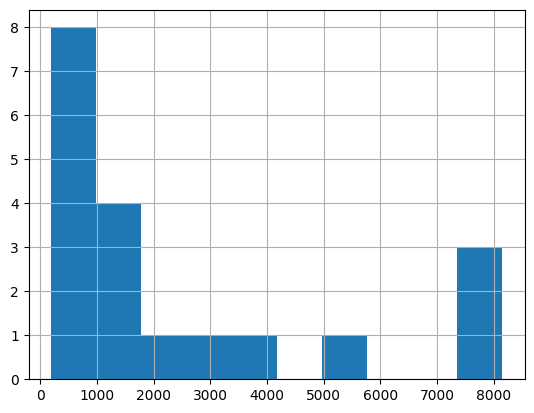

In [106]:
groups["Subtotal"].hist()

### Manipulating Data

In [111]:
groups["Shipping Province Name"]

0        Michigan
1         Ontario
2         Ontario
3        Kentucky
4     Mississippi
5       Tennessee
6       Louisiana
7        Kentucky
8           Texas
9           Texas
10          Texas
11       Michigan
12          Texas
13          Texas
14         Nevada
15         Nevada
16         Oregon
17         Oregon
18         Oregon
Name: Shipping Province Name, dtype: object

In [114]:
bags = [16] * len(order_processing_data["Name"])
bags

[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16]

In [116]:
groups["Lineitem name"]

0       Sanders Popcorn - Sea Salt Caramel Popcorn 10oz
1             TJX Canada Winners - 8z cornfetti popcorn
2         TJX Canada Winners - 8z Birthday Cake popcorn
3               Cornfetti - Clear Bag Case (20 x $3.19)
4     Mgm Resorts (Belle's Popcorn) - BELLES SEA SAL...
5            Caramel Corn - Clear Bag Case (20 x $3.19)
6       Chocolate Drizzle - Clear Bag Case (20 x $3.49)
7      Weigel's (10 count case) - BELLES TN GOLD MN 11Z
8             Sea Salt Caramel - 6 Cup Jar (16 x $5.99)
9          Birthday Cake - Printed Bags Case (20x$3.49)
10           Extra Buttery - 6 Cup Case (20 x $2.69) PL
11              Cornfetti - Clear Bag Case (20 x $3.19)
12    Spec's Belle's Popcorn (10 count case) - Dill ...
13          Extra Buttery - Clear Bag Case (20 x $2.69)
14    Mgm Resorts (Belle's Popcorn) - BELLES EXTRA B...
15    Mgm Resorts (Belle's Popcorn) - BELLES EXTRA B...
16                      Caramel Corn - 300 Cup Bulk Bag
17          Extra Buttery - Clear Bag Case (20 x